<a href="https://colab.research.google.com/github/SarathyS101/AniPortrait/blob/main/Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure the following directories exist in your runtime environment for the code to work:
/content/Average_Lambert_Projection,
/content/Max_PM_Projections,
/content/particulate_matter_data_06,
/content/smoke_data_03_sfc

In [ ]:
!pip install pygrib awscli cartopy

In [ ]:
import subprocess
import os
import requests

directories =[];
# This loop is only meant to analyze data over a month, so the stem can manually be set
start_month_stem="202501"
# Start date directory
calendar_day_start = 1
# End date directory
calendar_day_end = 28
# You iterate the numbers from the calendar start date and end date inclusive and append them to the path of the grib file with the particulate matter data to analyze
for calendar_day_num in range(calendar_day_start, calendar_day_end+1):
  # Appending the grib files that contain the max particulate matter concentration in 1 hr intervals that we require from bucket
  directory_06 = f"/AQMv7/CS/{start_month_stem}{calendar_day_num:02d}/06/aqm.t06z.max_1hr_pm25_bc.{start_month_stem}{calendar_day_num:02d}.227.grib2"
  directories.append(directory_06)
# Checking if the grib files downloaded match the format as specified (not validated)
print(directories)
for directory in directories:
  # For every directory stored, we can make a GET rquest to AWS S3's storage and we then take the content in that file and then save it in the particulate_matter_data_06 folder (Max Concentrations recorded starting at 6 UTC
  URL = f"https://noaa-nws-naqfc-pds.s3.amazonaws.com{directory}"
  response = requests.get(URL)
  with open(os.path.join("/content/particulate_matter_data_06/",directory.split('/')[-1]), "wb") as data:
    data.write(response.content)








['/AQMv7/CS/20250101/06/aqm.t06z.max_1hr_pm25_bc.20250101.227.grib2', '/AQMv7/CS/20250102/06/aqm.t06z.max_1hr_pm25_bc.20250102.227.grib2', '/AQMv7/CS/20250103/06/aqm.t06z.max_1hr_pm25_bc.20250103.227.grib2', '/AQMv7/CS/20250104/06/aqm.t06z.max_1hr_pm25_bc.20250104.227.grib2', '/AQMv7/CS/20250105/06/aqm.t06z.max_1hr_pm25_bc.20250105.227.grib2', '/AQMv7/CS/20250106/06/aqm.t06z.max_1hr_pm25_bc.20250106.227.grib2', '/AQMv7/CS/20250107/06/aqm.t06z.max_1hr_pm25_bc.20250107.227.grib2', '/AQMv7/CS/20250108/06/aqm.t06z.max_1hr_pm25_bc.20250108.227.grib2', '/AQMv7/CS/20250109/06/aqm.t06z.max_1hr_pm25_bc.20250109.227.grib2', '/AQMv7/CS/20250110/06/aqm.t06z.max_1hr_pm25_bc.20250110.227.grib2', '/AQMv7/CS/20250111/06/aqm.t06z.max_1hr_pm25_bc.20250111.227.grib2', '/AQMv7/CS/20250112/06/aqm.t06z.max_1hr_pm25_bc.20250112.227.grib2', '/AQMv7/CS/20250113/06/aqm.t06z.max_1hr_pm25_bc.20250113.227.grib2', '/AQMv7/CS/20250114/06/aqm.t06z.max_1hr_pm25_bc.20250114.227.grib2', '/AQMv7/CS/20250115/06/aqm.t06z.m

In [ ]:
import pygrib as pg
import numpy as np
import matplotlib.pyplot as plt
import os


# Sort the files by their name, so the lambert graphs come out in order of date
files = sorted(os.listdir("/content/particulate_matter_data_06/"))
# Iterate through all the files in the now sorter directory
for file in files:

  # Opening the GRIB2 file and storing it in the data_set variable
  data_set = pg.open(os.path.join("/content/particulate_matter_data_06/",file))

  # It's possible to load the dataset as a list of different messages, and analyze the data in just one of these messages.

  #In this case we're analyzing the first 22 hours after the set forecast time of 6 UTC, and grabbing the lambert implied fields within that message
  messages = list(data_set)
  pm25_first_day = messages[0]

  # Extract the data values of that are located in the first 22 hours after the forecase time, and data is now initialized as a 2D numpy array with the averages of the particulate matter data
  data = pm25_first_day.values

  # Get all the latitude and longitude values from that 2D numpy array
  latitudes, longitudes = pm25_first_day.latlons()

  # Creating a lambert projection with a contour scale given by the plasma color map
  plt.figure(figsize=(10, 8))
  plt.contourf(longitudes, latitudes, data, cmap='plasma')
  plt.colorbar(label='Particulate Matter Density(10^-6 g/m^3)')
  plt.title(f"Particulate Matter (PM2.5) Forecast - HR: 0-22 {file.split('.')[-3]}")
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  # Save the projection to a different directory to export projections
  plt.savefig(os.path.join("/content/Average_Lambert_Projection",file.split('.')[-3]), dpi=300, bbox_inches='tight')
  plt.close()




In [ ]:
import pygrib as pg
import numpy as np
import matplotlib.pyplot as plt
import os


# Sort the files by their name, so the lambert graphs come out in order of date
files = sorted(os.listdir("/content/particulate_matter_data_06/"))
# Iterate through all the files in the now sorter directory
for file in files:

  # Opening the GRIB2 file and storing it in the data_set variable
  data_set = pg.open(os.path.join("/content/particulate_matter_data_06/",file))

  # It's possible to load the dataset as a list of different messages, and analyze the data in just one of these messages.

  #In this case we're analyzing the first 22 hours after the set forecast time of 6 UTC, and grabbing the lambert implied fields within that message
  messages = list(data_set)
  pm25_first_day = messages[0]

  # Extract the data values of that are located in the first 22 hours after the forecase time, and data is now initialized as a 2D numpy array with the averages of the particulate matter data
  data = pm25_first_day.values

  # Get all the latitude and longitude values from that 2D numpy array
  latitudes, longitudes = pm25_first_day.latlons()

  # This I had to learn more about online and through ChatGPT but that 2D array that nupy holds is basically being flattened to this 1D array, where it then finds the max concentration and then data.shape puts it back in that row, index form that we associate with 2d arrays
  max_idx = np.unravel_index(np.argmax(data), data.shape)
  # We can then use these row, column indexes to match the max concentration's latitude and longitude
  max_lat, max_lon = latitudes[max_idx], longitudes[max_idx]

  # Let's us zoom in on the max region with a box that's only a 10 by 10 longxlat box rather than looking at the whole continental United States
  zoom_lat_min, zoom_lat_max = max_lat - 5, max_lat + 5
  zoom_lon_min, zoom_lon_max = max_lon - 5, max_lon + 5



    # Filter data so that only latitudes and longitues that fall into the window containing the max concentration coordinates; otherwise, it wont be displayed if it fails to get past that filter logic
  zoom_data = np.where((latitudes >= zoom_lat_min) & (latitudes <= zoom_lat_max) & (longitudes >= zoom_lon_min) & (longitudes <= zoom_lon_max), data, np.nan)

  # Plot the zoomed-in region
  plt.figure(figsize=(10, 8))
  plt.contourf(longitudes, latitudes, zoom_data, cmap='plasma')
  plt.colorbar(label='Particulate Matter Density(10^-6 g/m^3)')
  plt.title(f"Zoomed-In PM2.5 Forecast -{file.split('.')[-3]}- Max at ({max_lat:.2f}, {max_lon:.2f})")
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.xlim(zoom_lon_min, zoom_lon_max)
  plt.ylim(zoom_lat_min, zoom_lat_max)
    # Save the projection to a different directory to export projections
  plt.savefig(os.path.join("/content/Max_PM_Projections",file.split('.')[-3]), dpi=300, bbox_inches='tight')
  plt.close()



In [ ]:
import pygrib
import numpy as np
import pandas as pd
import os

# Will store the rows of information needed to initialize the dataframe and later convert to csv using pandas
data_records = []

files = sorted(os.listdir("/content/particulate_matter_data_06/"))

for file in files:
     # Opening the GRIB2 file and storing it in the data_set variable
  data_set = pg.open(os.path.join("/content/particulate_matter_data_06/",file))

  # It's possible to load the dataset as a list of different messages, and analyze the data in just one of these messages.

  #In this case we're analyzing the first 22 hours after the set forecast time of 6 UTC, and grabbing the lambert implied fields within that message
  messages = list(data_set)
  pm25_first_day = messages[0]

  # Extract the data values of that are located in the first 22 hours after the forecase time, and data is now initialized as a 2D numpy array with the averages of the particulate matter data
  data = pm25_first_day.values

  # Get all the latitude and longitude values from that 2D numpy array
  latitudes, longitudes = pm25_first_day.latlons()

  # This I had to learn more about online and through ChatGPT but that 2D array that nupy holds is basically being flattened to this 1D array, where it then finds the max concentration and then data.shape puts it back in that row, index form that we associate with 2d arrays
  max_idx = np.unravel_index(np.argmax(data), data.shape)
  # We can then use these row, column indexes to match the max concentration's latitude and longitude
  max_lat, max_lon = latitudes[max_idx], longitudes[max_idx]
  # Append all the data to the array for each date
  data_records.append([file.split('.')[-3], data[max_idx], max_lat, max_lon])

# Convert to a Pandas DataFrame from the array of row objects w/ the title
df = pd.DataFrame(data_records, columns=["Date", "Max Concentration (10^-6 g/m^3)", "Latitude", "Longitude"])

print(df)

# Save table to CSV to be used in the next segment
df.to_csv("pm25_max_concentrations.csv", index=False)


        Date  Max Concentration (10^-6 g/m^3)   Latitude   Longitude
0   20250101                        83.177519  33.674786 -117.838953
1   20250102                        89.356257  33.381114 -112.090884
2   20250103                       424.360000  55.814660 -112.399441
3   20250104                        64.754471  39.838173 -120.413810
4   20250105                       121.221745  34.352846 -111.030232
5   20250106                        57.293222  32.842913 -112.009645
6   20250107                      1336.200000  54.365754 -115.745434
7   20250108                       561.850000  33.998289 -118.457311
8   20250109                     16679.000000  34.034936 -118.520282
9   20250110                      2183.800000  34.034936 -118.520282
10  20250111                       468.991471  34.055911 -118.690501
11  20250112                      1879.200000  33.849436 -118.536281
12  20250113                       268.850000  34.034936 -118.520282
13  20250114                      

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("pm25_max_concentrations.csv")

# These are the latitude and longitude range for the state of California
lat_min, lat_max = 32.5121, 42.0126  # Adjust as needed
lon_min, lon_max = -124.6509, -114.1315  # Adjust as needed

# Load the csv file we made in the previous segment and apply a mask logic that will allow us to only keep certain rows that confine with the Latitude and Longitude values
filtered_df = df[(df["Latitude"] >= lat_min) & (df["Latitude"] <= lat_max) &
                 (df["Longitude"] >= lon_min) & (df["Longitude"] <= lon_max)]

# Save the filtered data back to a new CSV file
filtered_df.to_csv("filtered_pm25_max_concentrations.csv", index=False)


print(filtered_df)


        Date  Max Concentration (10^-6 g/m^3)   Latitude   Longitude
0   20250101                        83.177519  33.674786 -117.838953
3   20250104                        64.754471  39.838173 -120.413810
7   20250108                       561.850000  33.998289 -118.457311
8   20250109                     16679.000000  34.034936 -118.520282
9   20250110                      2183.800000  34.034936 -118.520282
10  20250111                       468.991471  34.055911 -118.690501
11  20250112                      1879.200000  33.849436 -118.536281
12  20250113                       268.850000  34.034936 -118.520282
22  20250123                       118.321603  34.403076 -118.820195
24  20250125                      4197.600000  32.612033 -116.916020


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


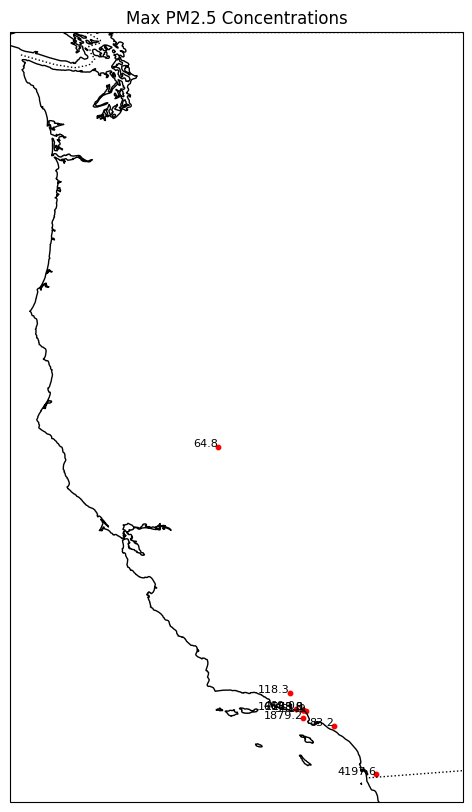

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the filtered particulate matter concentration from the csv of just the max concentrations reported in California
filtered_df = pd.read_csv("filtered_pm25_max_concentrations.csv")

# Use cartopy to create a plot
fig = plt.figure(figsize=(10, 10))
ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Adds coastlines, country borders, and state borders in the United States on to the map
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

# Plotting the max contentration values depending on their longitude and latitude on the cartopy figure
ax.scatter(filtered_df["Longitude"], filtered_df["Latitude"], color='green', s=10, transform=ccrs.PlateCarree())

# Set the scale of the map to only look at the California region
ax.set_extent([-125.0, -115.0, 32.0, 49.0], crs=ccrs.PlateCarree())


# Set title and show the map
ax.set_title("Max PM2.5 Concentrations in the California Region Alone")
plt.show()





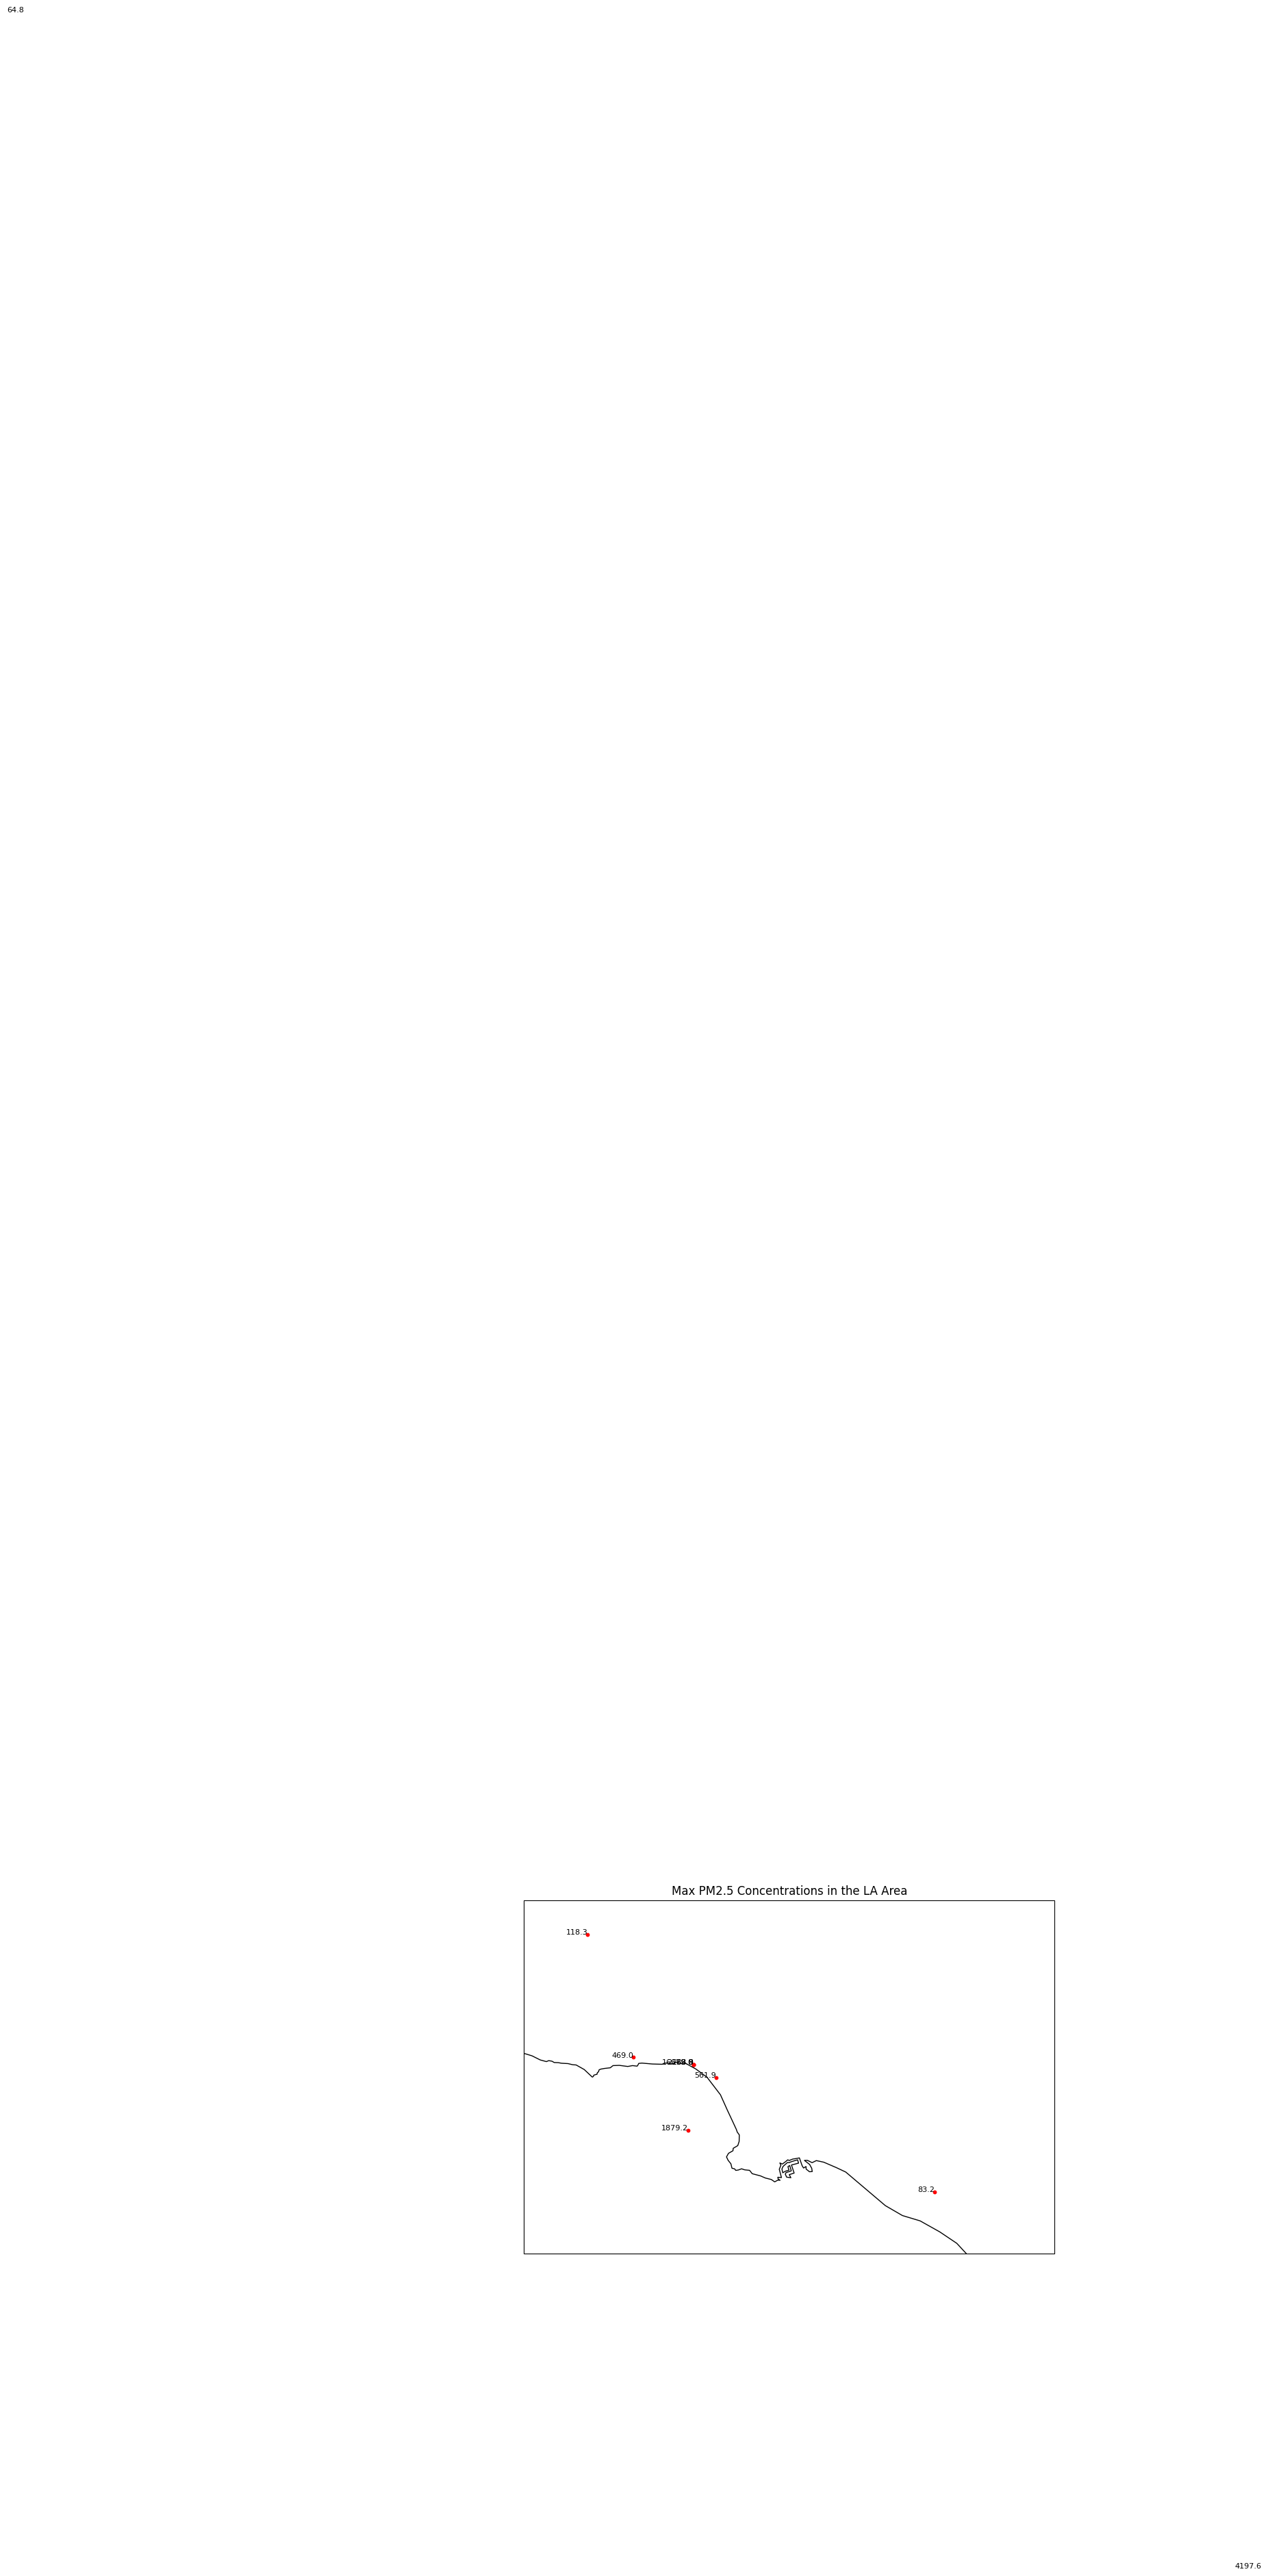

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the filtered particulate matter concentration from the csv of just the max concentrations reported in California
filtered_df = pd.read_csv("filtered_pm25_max_concentrations.csv")

# Use cartopy to create a plot
fig = plt.figure(figsize=(10, 10))
ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Adds coastlines, country borders, and state borders in the United States on to the map
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

# Plotting the max contentration values depending on their longitude and latitude on the cartopy figure
ax.scatter(filtered_df["Longitude"], filtered_df["Latitude"], color='green', s=10, transform=ccrs.PlateCarree())

# Set the extent for the map to focus on Palisades Region only
ax.set_extent([-119.0, -117.5, 33.5, 34.5], crs=ccrs.PlateCarree())

# Set title and show the map
ax.set_title("Max PM2.5 Concentrations in the LA Area")
plt.show()







START OF SMOKE ANALYSIS SECTION

In [ ]:
!aws s3 ls --no-sign-request s3://noaa-nws-naqfc-pds/RAP_Smoke/CS/20250111/03/

2025-01-11 18:03:50   18508334 rap.t03z.1hr_ColSmoke.20250111.227.grib2
2025-01-11 18:03:50   16193618 rap.t03z.1hr_SfcSmoke.20250111.227.grib2


In [ ]:
!aws s3 cp --no-sign-request s3://noaa-nws-naqfc-pds/RAP_Smoke/CS/20250111/03/rap.t03z.1hr_SfcSmoke.20250111.227.grib2 .


download: s3://noaa-nws-naqfc-pds/RAP_Smoke/CS/20250111/03/rap.t03z.1hr_SfcSmoke.20250111.227.grib2 to ./rap.t03z.1hr_SfcSmoke.20250111.227.grib2


In [ ]:
import subprocess
import os
import requests

directories =[];
# This loop is only meant to analyze data over a month, so the stem can manually be set
start_month_stem="202501"
# Start date directory
calendar_day_start = 1
# End date directory
calendar_day_end = 28
# You iterate the numbers from the calendar start date and end date inclusive and append them to the path of the grib file with the surface level smoke data to analyze
for calendar_day in range(calendar_day_start, calendar_day_end+1):
  #append all the
  directory_03 = f"/RAP_Smoke/CS/{start_month_stem}{calendar_day:02d}/03/rap.t03z.1hr_SfcSmoke.{start_month_stem}{calendar_day:02d}.227.grib2"
  directories.append(directory_03)
print(directories)
for directory in directories:
   # For every directory stored, we can make a GET request to AWS S3's storage and we then take the content in that file and then save it in the smoke_data_03_sfc folder (Surface Level Smokek starting at 3 UTC)
  url = f"https://noaa-nws-naqfc-pds.s3.amazonaws.com{directory}"
  response = requests.get(url)
  with open(os.path.join("/content/smoke_data_03_sfc/",directory.split('/')[-1]), "wb") as data:
    data.write(response.content)



['/RAP_Smoke/CS/20250101/03/rap.t03z.1hr_SfcSmoke.20250101.227.grib2', '/RAP_Smoke/CS/20250102/03/rap.t03z.1hr_SfcSmoke.20250102.227.grib2', '/RAP_Smoke/CS/20250103/03/rap.t03z.1hr_SfcSmoke.20250103.227.grib2', '/RAP_Smoke/CS/20250104/03/rap.t03z.1hr_SfcSmoke.20250104.227.grib2', '/RAP_Smoke/CS/20250105/03/rap.t03z.1hr_SfcSmoke.20250105.227.grib2', '/RAP_Smoke/CS/20250106/03/rap.t03z.1hr_SfcSmoke.20250106.227.grib2', '/RAP_Smoke/CS/20250107/03/rap.t03z.1hr_SfcSmoke.20250107.227.grib2', '/RAP_Smoke/CS/20250108/03/rap.t03z.1hr_SfcSmoke.20250108.227.grib2', '/RAP_Smoke/CS/20250109/03/rap.t03z.1hr_SfcSmoke.20250109.227.grib2', '/RAP_Smoke/CS/20250110/03/rap.t03z.1hr_SfcSmoke.20250110.227.grib2', '/RAP_Smoke/CS/20250111/03/rap.t03z.1hr_SfcSmoke.20250111.227.grib2', '/RAP_Smoke/CS/20250112/03/rap.t03z.1hr_SfcSmoke.20250112.227.grib2', '/RAP_Smoke/CS/20250113/03/rap.t03z.1hr_SfcSmoke.20250113.227.grib2', '/RAP_Smoke/CS/20250114/03/rap.t03z.1hr_SfcSmoke.20250114.227.grib2', '/RAP_Smoke/CS/2025

In [ ]:
import pygrib as pg
import numpy as np
import matplotlib.pyplot as plt
import os

files = sorted(os.listdir("/content/smoke_data_03_sfc/"))

for file in files:
    print(file)

    # Open the grib file
    grbs = pg.open(os.path.join("/content/smoke_data_03_sfc/", file))

    # Get all messages
    messages = list(grbs)
    print(len(messages))
    if(len(messages)==0):
      # If there's no content or messages in that file just delete it and dont bother looking at it
      os.remove(os.path.join("/content/smoke_data_03_sfc/", file))
      print(f"Total number of messages: {len(messages)}")


rap.t03z.1hr_SfcSmoke.20250101.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250102.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250103.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250104.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250105.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250106.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250107.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250108.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250109.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250110.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250111.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250112.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250113.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250114.227.grib2
0
Total number of messages: 0
rap.t03z.1hr_SfcSmoke.20250115.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250116.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250117.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250118.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250119.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250120.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250121.227.grib2
52
rap.t03z.1hr_SfcSmoke.20250122.227.grib2
52
rap.t

In [ ]:
import os
import numpy as np
import pygrib as pg
import pandas as pd

data_dir = "/content/smoke_data_03_sfc/"

# Make sure the files are outputting in chronological order rather than random
files = sorted(os.listdir(data_dir))

# Will append rows to this and then add to df later
data_records = []

for file in files:
    grib_file = os.path.join(data_dir, file)

    try:
        grbs = pg.open(grib_file)
    except Exception as e:
        print(f"Error loading dataset: {e}")
        continue

    # We know the parameter name of the smoke variable already so we can just extract that
    smoke_var = grbs.select(parameterName="Mass density", level=8)[0]


    smoke_data = smoke_var.values  # Gives you smoke density as a 2d array
    latitudes, longitudes = smoke_var.latlons()  # 2d array of each latitudes and longitudes

    # # This I had to learn more about online and through ChatGPT but that 2D array that nupy holds is basically being flattened to this 1D array, where it then finds the max concentration and then data.shape puts it back in that row, index form that we associate with 2d arrays
    max_idx = np.unravel_index(np.nanargmax(smoke_data), smoke_data.shape)
    # We can then use these row, column indexes to match the max concentration's latitude and longitude
    max_lat, max_lon = latitudes[max_idx], longitudes[max_idx]
    max_value = smoke_data[max_idx]

    # Extracting the date from filename
    date = file.split('.')[-3]

    # Append row to list
    data_records.append([date, f"{max_value:.17f}", f"{max_lat:.4f}", f"{max_lon:.4f}"])
    print(date)
    print(f"Highest smoke density ({max_value}) at: Latitude={max_lat}, Longitude={max_lon}")

# Convert to a Pandas Datagrame with the list of row objects and the following columns

lat_min, lat_max = 32.5121, 42.0126  # Adjust as needed
lon_min, lon_max = -124.6509, -114.1315  # Adjust as needed

# Convert to a Pandas Datagrame with the list of row objects and the following columns
df = pd.DataFrame(data_records, columns=["Date", "Highest Smoke Density (10^-6 g/m^3)", "Latitude", "Longitude"])
# Load the csv file we made in the previous line and apply a mask logic that will allow us to only keep certain rows that confine with the Latitude and Longitude values
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")
filtered_df = df[(df["Latitude"] >= lat_min) & (df["Latitude"] <= lat_max) &
                 (df["Longitude"] >= lon_min) & (df["Longitude"] <= lon_max)]

# Print table
print(df)

# Save table to CSV
filtered_df.to_csv("surfacesmoke_max_concentrations.csv", index=False)

20250101
Highest smoke density (1.0396200000000002e-08) at: Latitude=31.727622721360742, Longitude=-115.99040814863399
20250102
Highest smoke density (1.1506000000000002e-08) at: Latitude=34.411720187964804, Longitude=-95.76845194048636
20250103
Highest smoke density (4.853840000000001e-08) at: Latitude=55.6134922856524, Longitude=-112.49132180766159
20250104
Highest smoke density (3.1838400000000005e-08) at: Latitude=30.94336216532314, Longitude=-113.064852729271
20250105
Highest smoke density (3.958480000000001e-08) at: Latitude=31.458609633533236, Longitude=-86.21998871635373
20250106
Highest smoke density (2.6452000000000004e-08) at: Latitude=30.74418245740406, Longitude=-112.39385627508781
20250107
Highest smoke density (3.66088e-08) at: Latitude=30.867695721656773, Longitude=-112.51915999005566
20250108
Highest smoke density (6.071360000000002e-08) at: Latitude=33.990516295559814, Longitude=-118.51089224136545
20250109
Highest smoke density (6.834720000000001e-07) at: Latitude=33

In [ ]:
import shutil
import os
dir_path = '/content/smoke_data_03_sfc/'
shutil.rmtree(dir_path)
os.makedirs(dir_path)


End of Smoke Analysis Section